# Importing libraries 

In [32]:
%matplotlib inline
from random import randrange
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from sklearn.utils import shuffle
import random

## Loading the image and resizing it

In [44]:
img = cv.imread('car.jpg',0)
img =cv.resize(img,(400,400))
f = np.fft.fft2(img)
magnitude=np.abs(f)


#  input image

(Text(0.5,1,'Input Image'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

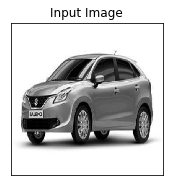

In [45]:
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])

# initializing and changing the phase


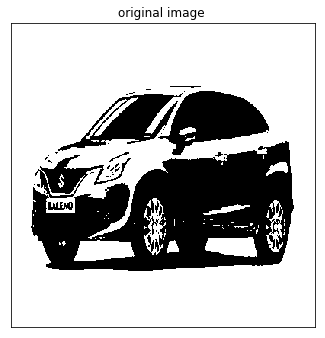

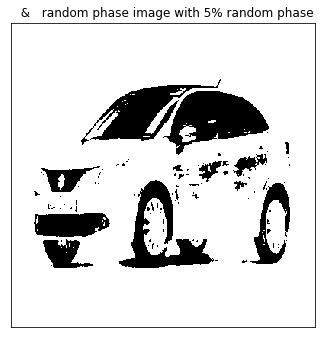

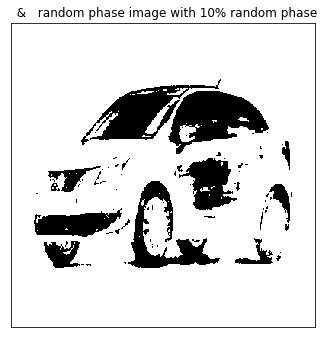

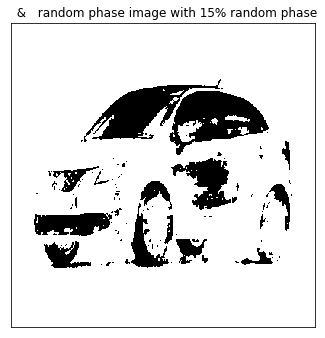

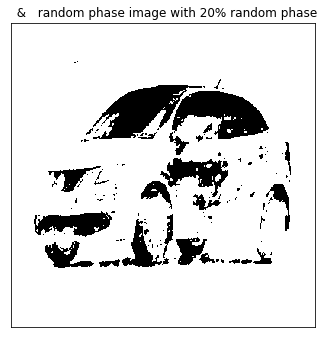

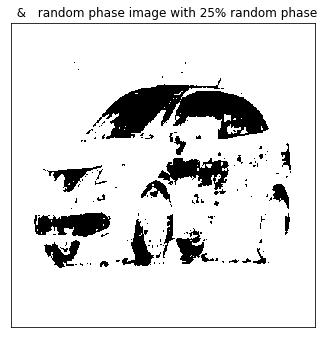

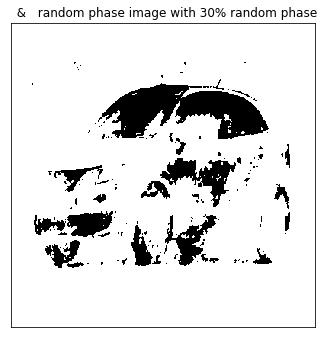

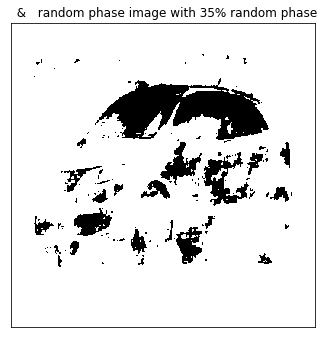

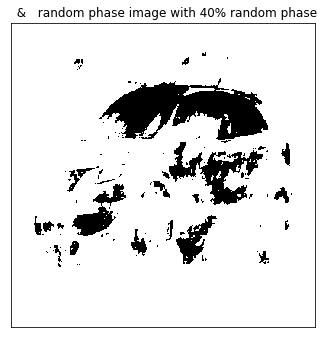

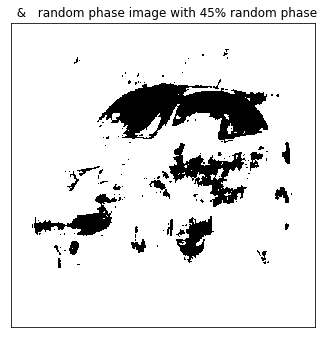

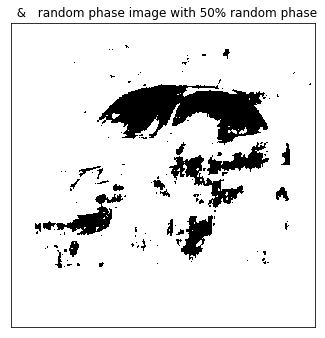

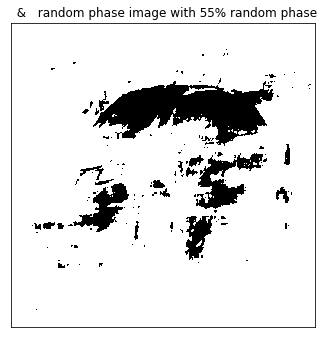

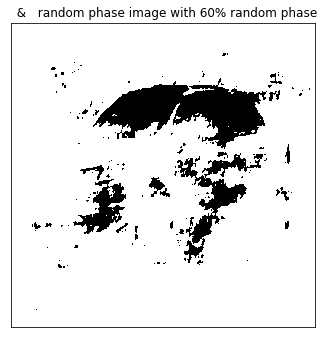

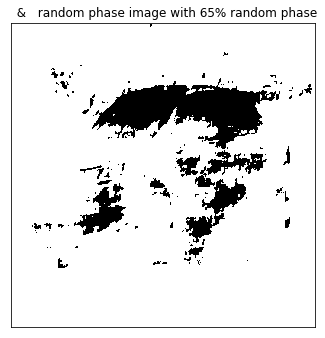

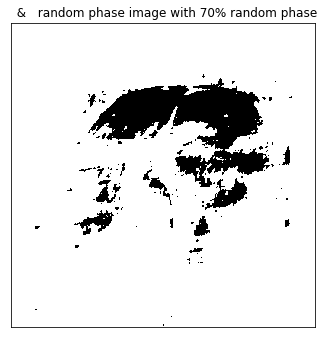

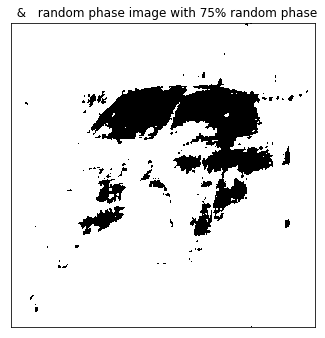

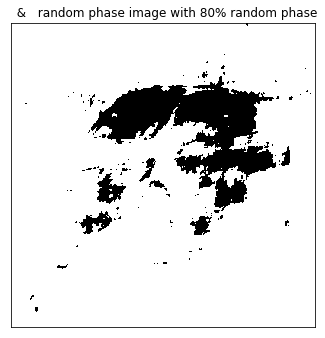

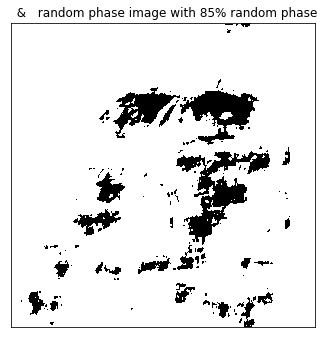

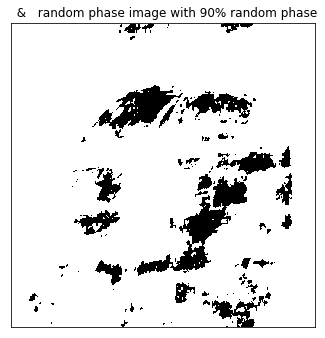

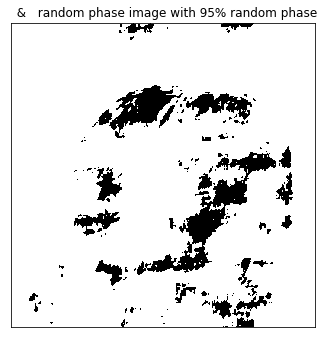

In [46]:
plt.figure(figsize=(12,12))    
#original image    
original= np.abs(np.fft.ifft2(magnitude*np.exp(1j*(np.angle(f)))))
    #thresholding the original image
thresh = 127
original = cv.threshold(original, thresh, 255, cv.THRESH_BINARY)[1]
plt.subplot(121),plt.imshow(original, cmap='gray')
plt.title('original image '), plt.xticks([]), plt.yticks([])
phase=np.angle(f)
l=np.angle(f)
r= np.ravel(phase)

for g in range(1,20):
    magnitude = np.abs(f)
    r= np.ravel(r)
    for i in range(0,4000):
        ri1 = randrange(len(r))
        ri2 = randrange(len(r))
        #print r[ri1], r[ri2]
        t=r[ri1]
        r[ri1]=r[ri2]
        r[ri2]=t
    r = np.reshape(r, (400, 400))    
    plt.figure(figsize=(12,12))    
    #generating the image with random phase
    random_phase_img= np.abs(np.fft.ifft2(magnitude*np.exp(1j*(r))))
    q=5*g
    random_phase_img = cv.threshold(random_phase_img, thresh, 255, cv.THRESH_BINARY)[1]
    plt.subplot(122),plt.imshow(random_phase_img, cmap = 'gray')
    plt.title('  &   random phase image with '+ str(q) +"% random phase"), plt.xticks([]), plt.yticks([])
    plt.show()